# 2. ARMA 過程
## 2.1 ARMA 過程の性質
時系列データの基本となる自己回帰移動平均(ARMA: auto regressive moving average)モデルについて。ARMA 過程は AR 過程と MA 過程を組み合わせたモデル。

例えば1次の自己相関を持つ時系列データをモデル化することを考える。ひとつの方法は $y_t$ と $y_{t-1}$ のモデルに共通の成分を含ませるというもの。具体的には、
$$y_t = a + b$$
$$y_{t-1} = c + b$$
というモデル化を行えば、共通の $b$ によって $y_t$ と $y_{t-1}$ が相関を持つことをモデル化できる。これが MA モデル。

もうひとつの方法はもっと直接的で、 $y_t$ のモデルに $y_{t-1}$ を含めるもの。具体的には以下。
$$y_t = ay_{t-1} + b$$
これが AR モデルである。

### 2.1.1 MA 過程
MA 過程はホワイトノイズの線形和で表される。1次の MA 過程のモデル(MA(1) と表記)は以下。
$$y_t = \mu + \epsilon_t + \theta_1\epsilon_{t-1}$$
$$\epsilon_t \sim W.N.(\sigma^2)$$
$y_{t-1}$ のデータを作るときに使った $\epsilon_{t-1}$ の値を、重み $\theta_1$ をかけた上で加算している。$\epsilon$ は撹乱項と呼ばれる。

#### MA 過程の期待値
$$E(y_t)
= E(\mu + \epsilon_t + \theta_1\epsilon_{t-1})
= E(\mu) + E(\epsilon_t) + E(\theta_1\epsilon_{t-1})
= \mu$$
$\epsilon$ はホワイトノイズなので、期待値は 0 であるため。

よって MA 過程の期待値は $\mu$ である。

#### MA 過程の分散
$$\gamma_0
= Var(y_t)
= Var(\mu + \epsilon_t + \theta_1\epsilon_{t-1})$$

a が定数の時、$Var(X + a) = Var(X)$ なので

$$Var(\mu + \epsilon_t + \theta_1\epsilon_{t-1})
= Var(\epsilon_t + \theta_1\epsilon_{t-1})$$

分散について $Var(X,Y) = V(X) + V(Y) + 2Cov(X,Y)$ である。よって

$$Var(\epsilon_t + \theta_1\epsilon_{t-1})
= Var(\epsilon_t) + Var(\theta_1\epsilon_{t-1}) + 2Cov(\epsilon_t, \theta_1\epsilon_{t-1})$$

さらに分散について、a が定数の時 $Var(aX) = a^2Var(X)$ である。よって

$$Var(\epsilon_t) + Var(\theta_{t-1}\epsilon_{t-1}) + 2Cov(\epsilon_t, \theta_{t-1}\epsilon_{t-1})
= Var(\epsilon_t) + \theta_1^2Var(\epsilon_{t-1}) + 2Cov(\epsilon_t, \theta_1\epsilon_{t-1})$$

共分散について、$Cov(X,Y) = E((X - \overline{X})(Y - \overline{Y}))$ なので、$Cov(\epsilon_t, \theta_1\epsilon_{t-1}) = E((\epsilon_t - \overline{\epsilon_t})(\theta_1\epsilon_{t-1} - \overline{\theta_1\epsilon_{t-1}})) = \theta_1E((\epsilon_t - \overline{\epsilon_t})(\epsilon_{t-1} - \overline{\epsilon_{t-1}})) = \theta_1Cov(\epsilon_t, \theta_1\epsilon_{t-1})$ である。よって

$$Var(\epsilon_t) + \theta_1^2Var(\epsilon_{t-1}) + 2Cov(\epsilon_t, \theta_1\epsilon_{t-1})
= Var(\epsilon_t) + \theta_1^2Var(\epsilon_{t-1}) + 2\theta_1Cov(\epsilon_t, \epsilon_{t-1})$$

ここで $\epsilon$ はホワイトノイズなので $Cov(\epsilon_t, \epsilon_{t-1}) = 0$ である。よって

$$Var(\epsilon_t) + \theta_1^2Var(\epsilon_{t-1}) + 2\theta_1Cov(\epsilon_t, \epsilon_{t-1})
= Var(\epsilon_t) + \theta_1^2Var(\epsilon_{t-1})$$

$Var(\epsilon) = \sigma^2$ なので

$$Var(\epsilon_t) + \theta_1^2Var(\epsilon_{t-1})
= (1 + \theta_1^2)\sigma^2$$

よって MA(1) 過程の分散 $\gamma_0$ は $(1 + \theta_1^2)\sigma^2$ である。元々の分散 $\sigma^2$ よりも少し大きくなる。

*参考: https://mathtrain.jp/exvarcov*

#### MA 過程の自己相関
MA 過程では $\theta$ の大きさによって自己相関が変化する。$\theta$ が大きくなると過去の値と同じような値を取る確率が高くなっていくので、$\theta$ が大きくなると自己相関も大きくなるはず。MA(1) 過程の自己相関を具体的に計算してみる。まず1次の自己共分散は

$$\gamma_1 = Cov(y_t, y_{t-1})
= Cov(\mu + \epsilon_t + \theta_1\epsilon_{t-1}, \mu + \epsilon_{t-1} + \theta_1\epsilon_{t-2})$$

共分散について、$Cov(X,Y) = E((X - \overline{X})(Y - \overline{Y}))$ なので、

$$Cov(\mu + \epsilon_t + \theta_1\epsilon_{t-1}, \mu + \epsilon_{t-1} + \theta_1\epsilon_{t-2})
= E((\mu + \epsilon_t + \theta_1\epsilon_{t-1} - \overline{(\mu + \epsilon_t + \theta_1\epsilon_{t-1})})(\mu + \epsilon_{t-1} + \theta_1\epsilon_{t-2} - \overline{(\mu + \epsilon_{t-1} + \theta_1\epsilon_{t-2})}))
= E((\mu + \epsilon_t + \theta_1\epsilon_{t-1} - \mu)(\mu + \epsilon_{t-1} + \theta_1\epsilon_{t-2} - \mu))
= E((\epsilon_t + \theta_1\epsilon_{t-1})(\epsilon_{t-1} + \theta_1\epsilon_{t-2}))
= E(\epsilon_t \epsilon_{t-1} + \epsilon_t \theta_1\epsilon_{t-2} + \theta_1\epsilon_{t-1} \epsilon_{t-1} + \theta_1\epsilon_{t-1} \theta_1\epsilon_{t-2})
= E(\epsilon_t \epsilon_{t-1} + \theta_1\epsilon_t\epsilon_{t-2} + \theta_1\epsilon_{t-1}^2 + \theta_1^2\epsilon_{t-1} \epsilon_{t-2})
= E(\epsilon_t \epsilon_{t-1}) + E(\theta_1\epsilon_t\epsilon_{t-2}) + E(\theta_1\epsilon_{t-1}^2) + E(\theta_1^2\epsilon_{t-1} \epsilon_{t-2})
$$

ここで $\epsilon$ がホワイトノイズの場合、$\gamma_k = E(\epsilon_t\epsilon_{t-k})$ は $k = 0$ のとき $\sigma^2$、 $k \neq 0$ のとき $0$ である。よって

$$E(\epsilon_t \epsilon_{t-1}) + E(\theta_1\epsilon_t\epsilon_{t-2}) + E(\theta_1\epsilon_{t-1}^2) + E(\theta_1^2\epsilon_{t-1} \epsilon_{t-2})
= E(\theta_1\epsilon_{t-1}^2)
= \theta_1 E(\epsilon_{t-1}^2)
= \theta_1 \sigma^2
$$

この結果、MA(1)過程の1次自己共分散 $\gamma_1 = \theta_1 \sigma^2$ である。1次の自己相関は

$$\rho
= \frac{\gamma_1}{\gamma_0}
= \frac{\theta_1 \sigma^2}{(1 + \theta_1^2)\sigma^2}
= \frac{\theta_1}{1 + \theta_1^2}
$$

となる。

#### MA(1) 過程の2次以降の自己相関
$$\gamma_k
= Cov(y_t, t_{t-k})
= Cov(\mu + \epsilon_t + \theta_1\epsilon_{t-1}, \mu + \epsilon_{t-k} + \theta_1\epsilon_{t-k})
= E((\mu + \epsilon_t + \theta_1\epsilon_{t-1} - (\overline{\mu + \epsilon_t + \theta_1\epsilon_{t-1}}))(\mu + \epsilon_{t-k} + \theta_1\epsilon_{t-k} - (\overline{\mu + \epsilon_{t-k} + \theta_1\epsilon_{t-k}})))
= E((\epsilon_t + \theta_1\epsilon_{t-1})(\epsilon_{t-k} + \theta_1\epsilon_{t-k}))
= E(\epsilon_t\epsilon_{t-k} + \epsilon_t\theta_1\epsilon_{t-k} + \theta_1\epsilon_{t-1}\epsilon_{t-k} + \theta_1\epsilon_{t-1}\theta_1\epsilon_{t-k})
= E(\epsilon_t\epsilon_{t-k}) + E(\epsilon_t\theta_1\epsilon_{t-k}) + E(\theta_1\epsilon_{t-1}\epsilon_{t-k}) + E(\theta_1\epsilon_{t-1}\theta_1\epsilon_{t-k})
$$

$k \geqq 2$ なので、$\epsilon_t\epsilon_{t-k}$ と $\epsilon_{t-1}\epsilon_{t-k}$ はすべて 0 になる。

よって $\gamma_k = Cov(y_t, y_{t-k}) = 0$ である。

#### MA 過程の定常性
以上の結果より、過程の期待値と自己共分散は時刻 t に依存しない(時刻の差 k にのみ依存する)ことがわかるので、MA(1) 過程は(パラメータの値に関わらず)定常である。

#### MA(q) 過程とその性質
MA(1) 過程を自然に拡張し、MA(q) 過程を考える。式は以下。

$$y_t = \mu + \epsilon_t + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + \cdots + \theta_q\epsilon_{t-q}, \epsilon \sim W.N.(\sigma^2)$$

MA(1) と同じように、以下の性質が成り立つ。

##### 平均
$$E(y_t) = \mu$$

##### 分散
$$\gamma_0 = Var(y_t) = (1 + \theta_1^2 + \theta_2^2 + \cdots + \theta_q^2)\sigma^2$$

##### 自己共分散
- $1 \leq k \leq q $ のとき $$\gamma_k = (\theta_k + \theta_1\theta_{k+1} + \cdots \theta_{q-k}\theta_q)\sigma^2$$
- $k \geq q + 1$ のとき $$0$$

##### 定常性
MA 過程は常に定常である

##### 自己相関
- $1 \leq k \leq q $ のとき $$\rho_k = \frac{\theta_k + \theta_1\theta_{k+1} + \cdots + \theta_{q-k}\theta_q}{1 + \theta_1^2 + \theta_2^2 + \cdots + \theta_q^2}$$
- $k \geq q + 1$ のとき $$0$$

MA(q) 過程の q+ 1 次以降の自己相関は 0 になる。モデル化したい時系列データが MA 過程か AR 過程かを判定するときにヒントになる性質。

### 2.1.2 AR 過程
自己回帰過程(AR: autoregressive process)は、過去の自分自身の値に回帰される過程。1次の AR 過程 AR(1) は以下の式で表される。

$y_t = c + \phi_t y_{t-1} + \epsilon_t$ ただし $\epsilon_t \sim W.N.(\sigma^2)$

AR 過程は、パラメータ $\phi_t$ によって性質が大きく変わる。以下、R でいくつかグラフを描いてみる。

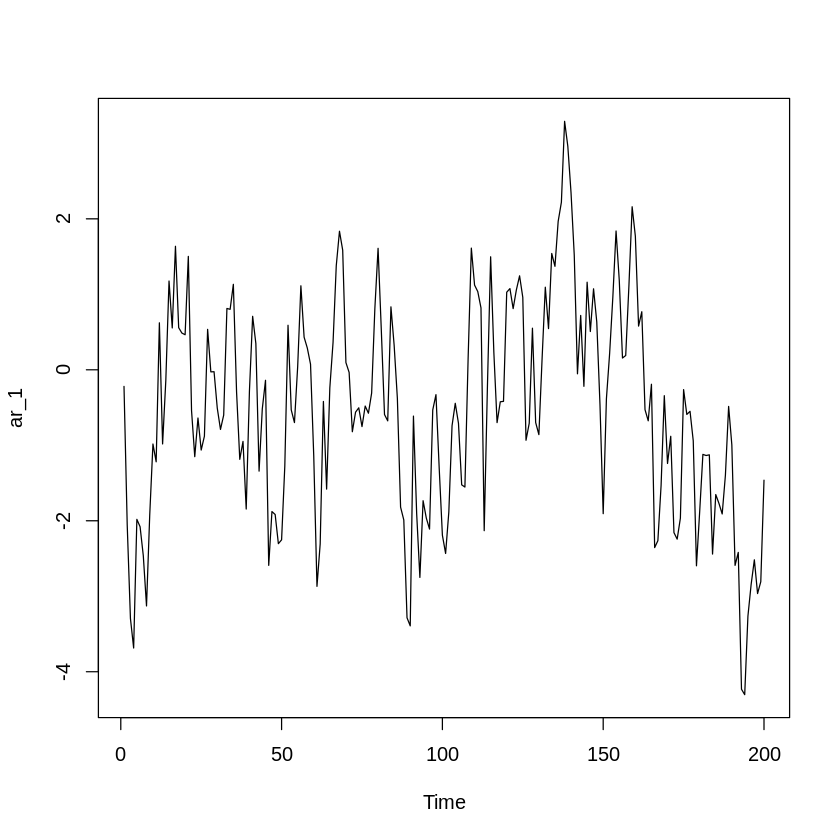

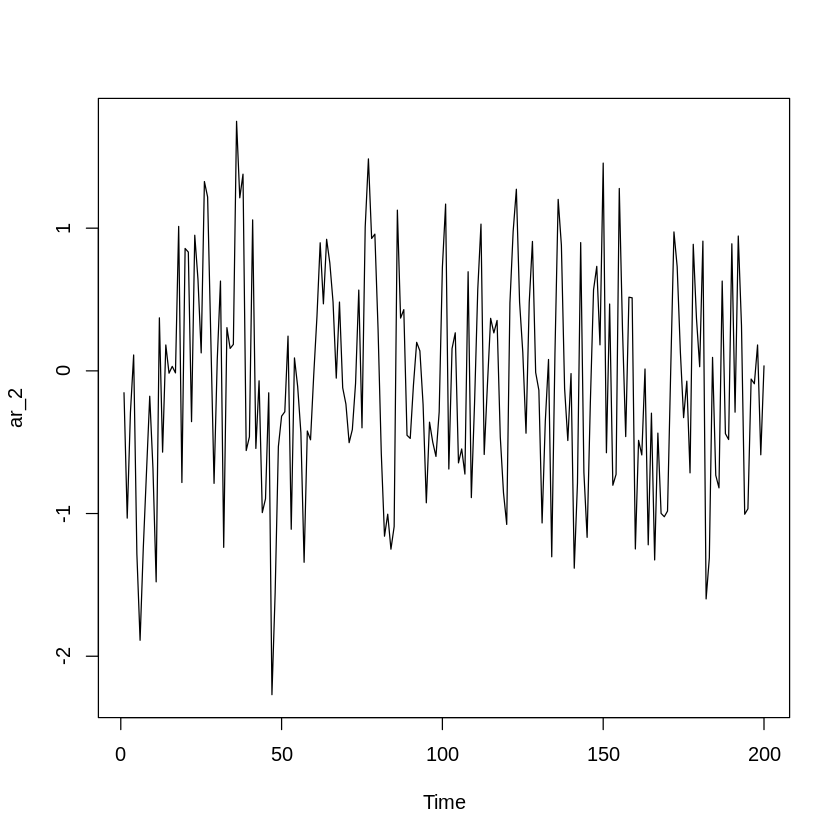

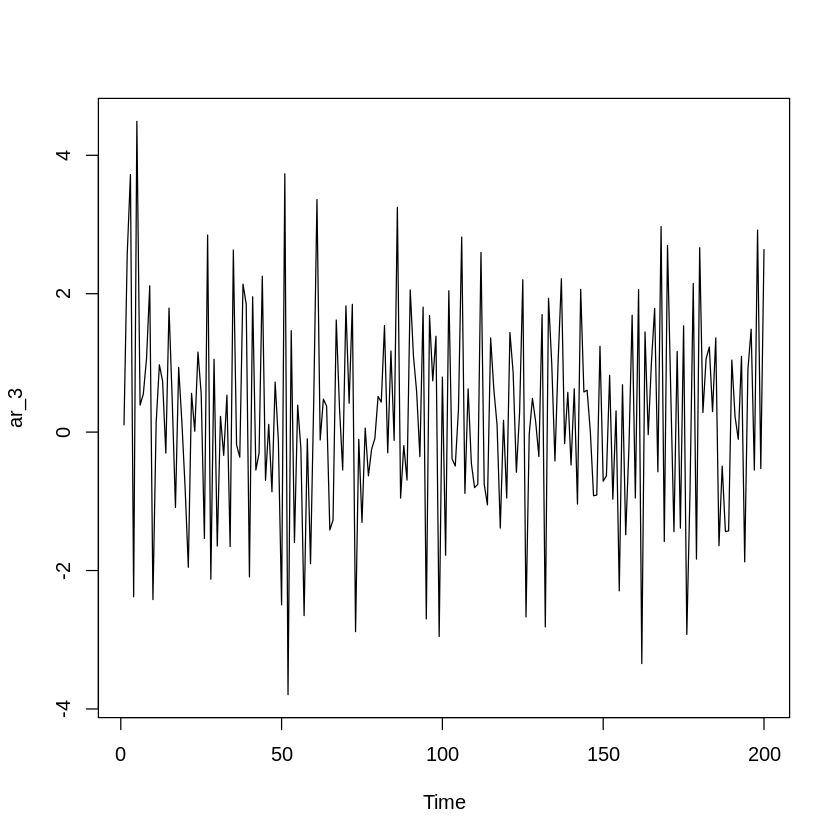

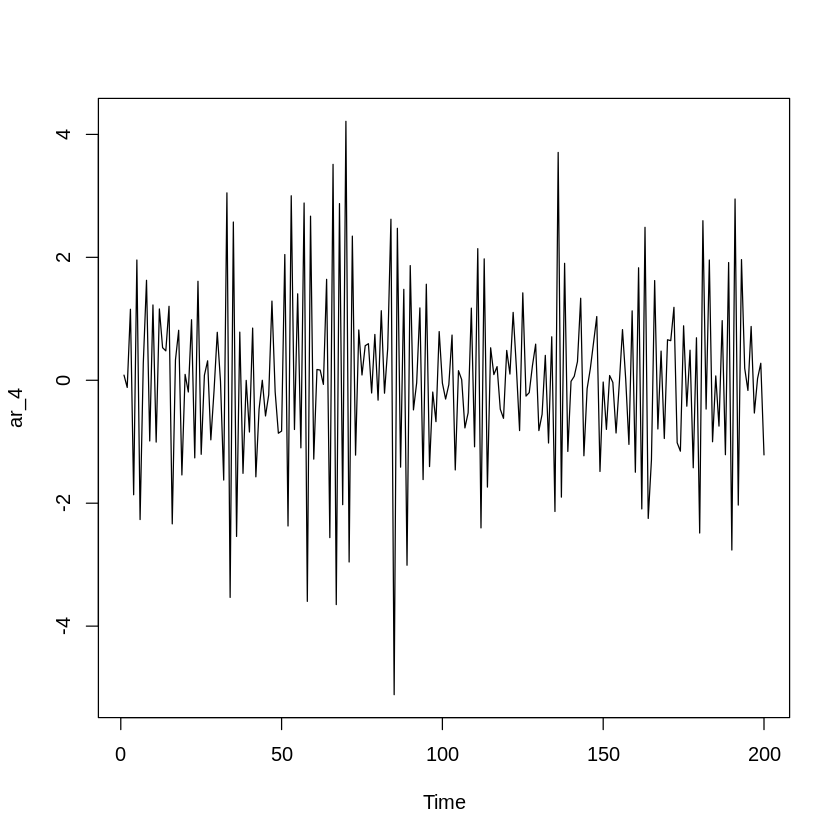

In [10]:
# 参考 http://tjo.hatenablog.com/entry/2013/07/12/184704

# y_t = 0.8 y_{t-1} + epsilon
ar_1 <- arima.sim(n=200, model=list(ar=0.8), sd=sqrt(1))
plot(ar_1)

# y_t = 0.3 y_{t-1} + epsilon
ar_2 <- arima.sim(n=200, model=list(ar=0.3), sd=sqrt(0.5))
plot(ar_2)

# y_t = -0.3 y_{t-1} + epsilon
ar_3 <- arima.sim(n=200, model=list(ar=-0.3), sd=sqrt(2))
plot(ar_3)

# y_t = -0.8 y_{t-1} + epsilon
ar_4 <- arima.sim(n=200, model=list(ar=-0.8), sd=sqrt(1))
plot(ar_4)


パラメータ $\phi_t$ が1未満の場合、過程は定常となる。ちょうど1の場合は単位根過程と呼ばれる。以下、定常な AR(1) 過程の性質を見ていく。

##### AR 過程の期待値
$$E(y_t)
= E(c + \phi_1 y_{t-1} + \epsilon_t)
= c + \phi_1 E(y_{t-1})
$$

y は定常なので $y_t = y_{t-1} = \mu$ であるので

$E(y_t) = \mu$ かつ $c + \phi_1 E(y_{t-1}) = c + \phi_1 \mu$ であるので $\mu = c + \phi_1 \mu$$ である。よって過程の期待値は

$$E(y_t) = \mu = \frac{c}{1 - \phi_1}$$

#### AR 過程の期待値
$$Var(y_t)
= Var(c + \phi_1 y_{t-1} + \epsilon_t)
= Var(\phi_1 y_{t-1} + \epsilon_t)
= \phi_1^2 Var(y_{t-1}) + Var(\epsilon_t) + 2 Cov(\phi_1 y_{t-1}, \epsilon_t)
= \phi_1^2 Var(y_{t-1}) + \sigma^2
$$

ここで、過去の $y_{t-1}$ が今の撹乱項 $\epsilon_t$ と相関がないため $2Cov(\phi_1 y_{t-1}, \epsilon) = 0$ である。

$y_t$ が定常であるなら、$\gamma_0 = Var(y_t) = Var(y_{t-1})$ なので、

- $Var(y_t) = \phi_1^2 Var(y_{t-1}) + \sigma^2$
- $\gamma_0 = \phi_1^2 \gamma_0 + \sigma^2$

よって $\gamma_0 = \frac{\sigma^2}{1 - \phi_1^2}$ である。

#### AR 過程の自己相関
MA(1) 過程と異なり、$\phi_1 > 0$ とのき AR(1) 過程では2次以降の自己相関もすべて正になる。任意の t に対して $y_t$ と $y_{t-1}$ は相関があるので、任意の t,s に対して $y_t$ と $y_s$ は間接的に相関がある。

具体的に k 次の自己共分散を計算してみる。

$$\gamma_k
= Cov(y_t, y_{t-k})
= Cov(c + \phi_1 y_{t-1} + \epsilon_t, y_{t-k})
$$

ここで、$Cov(X + c, Y) = Cov(X, Y)$ であり、$Cov(X + Y, Z) = Cov(X, Z) + Cov(Y, Z)$ なので、

$$Cov(c + \phi_1 y_{t-1} + \epsilon_t, y_{t-k})
= Cov(\phi_1 y_{t-1} + \epsilon_t, y_{t-k})
= Cov(\phi_1 y_{t-1}, y_{t-k}) + Cov(\epsilon_t, y_{t-k})
= \phi_1 Cov(y_{t-1}, y_{t-k}) + Cov(\epsilon_t, y_{t-k})
$$

先ほどと同様、 $\epsilon_t$ と $y_{t-k}$ には相関がないので 0 である。

$$\phi_1 Cov(y_{t-1}, y_{t-k}) + Cov(\epsilon_t, y_{t-k})
= \phi_1 Cov(y_{t-1}, y_{t-k})
$$

$Cov(y, y_k) = \gamma_{k}$ であるから、

$$\phi_1 Cov(y_{t-1}, y_{t-k})
= \phi_1 \gamma_{1-k}
= \phi_1 \gamma_{k-1}
$$

つまり $\gamma_k = \phi_1 \gamma_{k-1}$ である。両辺を $\gamma_0$ で割ると、

- $\frac{\gamma_k}{\gamma_0} = \phi_1 \frac{\gamma_{k-1}}{\gamma_0}$
- $\rho_k = \phi_1 \rho_{k-1}$

となる。これをユール・ウォーカー方程式と呼ぶ。これは $y_t = c + \phi_1 y_{t-1} + \epsilon_t$ と同じ係数 $\phi_1$ を持った差分方程式であり、$\rho_0 = 1$ を用いると任意の t に対して自己相関 $\rho_t$ を逐次的に計算することができる。またこの結果から、AR 過程の自己相関は指数的に単調に減衰していくが、0 にはならないことがわかる。

### 2.1.3 ARMA 過程
ARMA 過程は AR 過程と MA 過程を単純に足し合わせた過程。AR(p) 過程と MA(q) 過程を足し合わせた ARMA(p,q) 過程は以下のように表される。

$$y_t = c + \phi_1 y_{t-1} + \cdots + \phi_p y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \cdots + \theta_q \epsilon_{t-q}$$
$$\epsilon_t \sim W.N.(\sigma^2)$$

#### 定常 ARMA(p,q) 過程の期待値
ARMA 過程の MA 過程の部分の期待値は 0 であるので、期待値は AR(p) 過程と同じである。
$$\mu = E(y_t) = \frac{c}{1 - \phi_1 - \phi_2 - \cdots -\phi_p}$$

#### 定常 ARMA(p,q) 過程の自己分散
q+1 次以降の自己共分散と自己相関は、MA 過程の影響がなくなるので、やはり AR 過程と同じである。
また自己相関は指数的に減少していく。これも AR 過程と同じである。


## 2.2 ARMA 過程の定常性と反転可能性
MA 過程は常に定常だが、AR 過程は係数によっては定常にならない。また同じ系列(同じ期待値と自己相関)を持つ MA 過程は複数ある。定常な時系列データを ARMA 過程でモデル化するときの係数の選び方の基準について。

### 2.2.1 AR 過程の定常性
AR 特性方程式のすべての解の絶対値が 1 よりも大きい時、AR 過程は定常になる。AR 過程が定常であるなら、MA($\infty$) 過程で書き直すことができる。実は AR 過程が定常であることと MA($\infty$) 過程で書き換えられることは同値。

### 2.2.2 MA 過程の反転可能性
同じ期待値と自己相関を持つ MA 過程は複数存在する。モデルを選択するときの基準になるのが反転可能性で、同じ期待値と自己相関を持つ MA 過程の中で、反転可能なものは1つしかない。反転可能とは、MA 過程を AR($\infty$) 過程で書き直せることである。

一部の AR 過程と MA 過程は、お互いにもう一方で書き直すことができる。この特徴はそれぞれの過程の性質を考えるときに役に立つ。例えば定常な AR 過程の場合、自己相関は次数に応じて指数的に減少していくので、考えている MA 過程が反転可能であれば、過去のデータの影響度は指数的に減少していくことがわかる。

### 2.2.3 ARMA 過程の定常・反転可能性
ARMA 過程は AR 過程と MA 過程の和で表現される。定常性について、MA 過程は常に定常なので AR 過程部分が定常であれば ARMA 過程全体も定常になる。つまり AR 過程の部分の特性方程式を作って、そのすべての解の絶対値が 1 より大きければ ARMA 過程は定常。反転可能性について、AR 過程の部分は反転する必要がないので無視できる。MA 過程部分は、その特性方程式の解の絶対値が 1 より大きければ反転可能。

ARMA 過程は AR 過程と MA 過程の強いほう(発散するものとか反転できないものとか)に影響される過程である。

### 2.3 ARMA モデルの推定
最小2乗法か最尤法がメジャー。

#### 2.3.1 最小2乗法
正しい値と予測値の差の2乗和を最小にしようとする方法。つまりモデルで説明できない部分を最小にしようとする方法である。AR(1) 過程の場合、 $y_{t-1}$ を使って $y_t$ を予測する(予測値は $\tilde{y_t}$ と書くことにする)ので、$(y_t - \tilde{y_t})^2$ を最小にするパラメータを探す。つまり AR(1) 過程の式 $y_t = c + \phi y_{t-1} + \epsilon_t$ の中の係数 $c$ と $\phi$ の適切な値を探す。そのためには $(y_t - \tilde{y_t})^2 = (y_t - (c + \phi y_{t-1}))^2$ を $c$ と $\phi$ でそれぞれ偏微分して 0 になる値を探せば良い。

最小2乗法は OLS(ordinary least square) と呼ばれ、最小2乗法で得られた最適パラメータは OLS 推定量と呼ばれる。OLS 推定量はよい性質を持つので、AR 過程のパラメータ推定にはよく使われる。ARMA モデルや GARCH モデルなどには最尤法が使われることが多い。

#### 2.3.2 最尤法
最尤法では、得られたデータを最も得られやすくする(尤もらしくする)ようにモデルを推定する方法である。例えば、コインを10回投げて表が8回出た場合、このコインが表になる確率を 0.8 と推定するような方法。具体的に計算すると、仮に表が出る確率が 0.5 とすると、 ${}_{10}C_2 (0.5^8)(0.5^2) = 0.0439453125$ なので約4%である。0.8 の場合は ${}_{10}C_8 (0.8^8)(0.2^2) = 0.3019898880000002$ なので約30%である。これは表が出る確率 p を変数と考えた対数尤度関数 $\mathcal{L}(p) = {}_{10}C_8 p^8(1-p)^2$ を p で微分して 0 になる部分を探すことで、解析的に解を求めることができる。

##### AR 過程に最尤法を適用するためには
AR(1) 過程に適用したい場合、推定するべきパラメータは $c$ と $\phi$ と $\sigma^2$ である。これらをまとめて $\Theta$ と書く。最尤法で推定を行う場合、初期値 $y_0$ から順番に条件付き確率を順番に求めていって、全体で確率が最大になるようなパラメータを求めるイメージ。

具体的に、特定の値 $y_1$ と $y_2$ がデータとして得られている場合、これが同時に起こる確率は $f(y_1, y_2)$ である。ベイスの法則($f_{X,Y}(x,y) = f_{X|Y}(x|y) \cdot f_Y(y)$)を使うと、$f_{Y_2,Y_1|Y_0}(y_2, y_1 | y_0; \Theta) = f_{Y_2 | Y_1,Y0}(y_2 | y_1,y_0;\Theta) \cdot f_{Y_1|Y_0}(y_1|y_0; \Theta)$ と書き換えられる。ここで例えば $f_{Y_1|Y_0}(y_1|y_0; \Theta)$ は、「パラメータ $\Theta$ がのとき、$Y_0$ が $y_0$ のとき、$Y_1$ が $y_1$ となる確率」を表している。AR(1) 過程の場合は2次以上の影響はないので無視することができるので、$f_{Y_2 | Y_1,Y0}(y_2 | y_1,y_0;\Theta) \cdot f_{Y_1|Y_0}(y_1|y_0; \Theta) = f_{Y_2|Y_1}(y_2|y_1;\Theta) \cdot f_{Y_1|Y_0}(y_1|y_0; \Theta)$ である。

順番に書き換えていけば、$Y_0$ から $Y_T$ までのすべての値が特定の値 $y_0$ から $y_T$ になる確率は $\prod_{t=1}^{T} f_{Y_t|Y_{t-1}}(y_t|y_{t-1};\Theta)$ になる。これをパラメータ $\Theta$ の関数だと考え、対数を取ったもの(対数尤度)は $\mathcal{L}(\Theta) = \sum_{t=1}^{T} log\ f_{Y_t|Y_{t-1}}(y_t|y_{t-1};\Theta)$ である。

ここで $\epsilon_t$ の分布をなんらか仮定する必要がある。扱いやすいので正規分布を仮定することが多い。ここでは $\epsilon_t \sim iid\ N(0, \sigma^2)$ を仮定すると、実は $y_t|y_{t-1} \sim N(c + \phi y_{t-1}, \sigma^2)$ (「$y_{t-1}$ が得られたときに $y_t$ が得られる確率は平均 $c + \phi y_{t-1}$ で分散 $\sigma^2$ の正規分布に従う」)となる。これを先程の対数尤度の式に代入して整理すると、対数尤度を最大にするパラメータ $c$ と $\phi$ は $y_t - c - \phi y_{t-1}$ を最小にするものだとわかる。実はこれは OLS 推定量と全く同じ。AR(1) においては最尤法と最小2乗法で推定量が同じになる。

### 2.4 ARMA モデルの選択
対象としている時系列データが ARMA(p,q) 過程であるとして、最適なパラメータを決める方法を考える。

#### 2.4.1 モデル候補の選択
ARMA モデルの選択は二段構えで行う。まずは適切な p と q を選ぶために、いくつかの組み合わせを試して適切なものに絞り込む。そのあと様々な情報量基準を使って(ある程度)客観的にモデルを選択する。

得られているデータから(様々な次数の)標本自己相関と偏自己相関を計算し、その様子から ARMA(p,q) の p と q を選択する。AR(p) 過程の自己相関は指数的に減少、MA(q) 過程の自己相関は q+1 次以降で 0 になる。逆に AR(p) 過程の偏自己相関は p+1 次以降で 0 になり、MA(q) 過程の偏自己相関は(AR($\infty$)過程に書き換えられるので)指数的に減少していく。これらの違いから、AR(p)/MA(q)/ARMA(p,q) のどれになるかをある程度選択することができる。

実際には標本自己相関は誤差を含むので、自己相関が p 次以降 0 になっているか、徐々に小さくなっているか、見分けることは難しい。この方法である程度候補を絞り込んだら、情報量基準を使ってもう少しまじめに評価する。

#### 2.4.2 情報量基準
情報量基準は、対数尤度とモデルのパラメータ数の和で定義される。モデルをどんどん複雑にすれば対数尤度は上がるが、過学習気味になり予測精度は下がってしまう。そこでパラメータ数に応じてペナルティを課すことでモデルが複雑になりすぎることを防ごうという考え方である。

ペナルティ部分はパラメータ数をそのまま使ってもいいが、標本数から計算した値で重み付けをしてもいい。つまり
$$IC = -2\mathcal{L}(\hat{\theta}) + p(T)k$$
である。$\mathcal{L}(\hat{\theta})$ は最大対数尤度、T は標本数、p は適当な関数、k はモデルのパラメータ数。p(T) を固定で 2 にしたものは AIC(赤池情報量基準)と呼ばれる有名なもの。$p(T) = log(T)$ とするとベイズ情報量基準。

#### 2.4.3 モデルの診断
推定したモデルが妥当か判断するためには $\epsilon_t$ に注目する。$\epsilon_t$ は、真のモデルにおいて、観測したデータに乗っている誤差である。真のモデルから推定したモデルを引いたものを残差 $e_t$ と言うが、推定したモデルが真のモデルに十分に近ければ、$e_t$ と $\epsilon_t$ は等しくなる。($y_t = c + \phi y_{t-1} + \epsilon_t$ のとき、残差は $y_t - \tilde{y_t}$ つまり $y_t - (\tilde{c} + \tilde{\phi}y_{t-1})$ である。($\epsilon_t$ の期待値は 0))

真のモデルであれば $\epsilon_t$ は自己相関を持たないはずなので、標本から計算した自己相関が 0 からどれくらい遠いかを見て検定を行う。

##### 例
経済成長率のデータに対してモデルの選択を行う。まずは標本自己相関、標本偏自己相関を適当な次数まで求め、候補を絞る。絞ったモデルに対して AIC と SIC を計算して最適なものを選ぶ。(AIC と SIC で選択されるモデルは異なることがあるので注意)

モデルを選んだら、それが妥当かどうかを確認する。具体的には、推定したモデルと実際のデータの残差を計算し、その自己相関が 0 に十分に近いか確認する。